## Download and extract dataset



In [ ]:
import os
import glob

# Install the kaggle library
!pip install kaggle

# Create a directory named .kaggle in the /root/ directory.
!mkdir -p /root/.kaggle

# Copy the kaggle (1).json file from /content/ to /root/.kaggle/.
!cp /content/kaggle\ \(1\).json /root/.kaggle/kaggle.json

# Change the permissions of the kaggle.json file to 600.
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset "misrakahmed/vegetable-image-dataset" from Kaggle to the /content/ directory.
!kaggle datasets download -d misrakahmed/vegetable-image-dataset -p /content/

# Unzip the downloaded dataset file vegetable-image-dataset.zip into the directory /content/vegetable_dataset.
!unzip /content/vegetable-image-dataset.zip -d /content/vegetable_dataset

## Load and preprocess images




In [ ]:
import cv2
import numpy as np

base_dir = '/content/vegetable_dataset/'
image_data = []
labels = []

In [ ]:
print(os.listdir(base_dir))

['Vegetable Images']


In [ ]:
base_dir = '/content/vegetable_dataset/Vegetable Images/'

image_data = []
labels = []

for dataset_type in ['train', 'test']:
    dataset_dir = os.path.join(base_dir, dataset_type)
    if not os.path.exists(dataset_dir):
        print(f"Warning: Directory not found: {dataset_dir}")
        continue

    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                try:
                    img = cv2.imread(image_path)
                    if img is not None:
                        img_resized = cv2.resize(img, (100, 100))
                        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
                        img_flat = img_gray.flatten()
                        image_data.append(img_flat)
                        labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

image_data = np.array(image_data)
labels = np.array(labels)

print(f"Processed {len(image_data)} images.")
print(f"Image data shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")

Processed 18000 images.
Image data shape: (18000, 10000)
Labels shape: (18000,)


## Prepare data for model training



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14400, 10000)
Shape of X_test: (3600, 10000)
Shape of y_train: (14400,)
Shape of y_test: (3600,)


## Train an svm classifier



In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

## Evaluate the model



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7553

Classification Report:
              precision    recall  f1-score   support

        Bean       0.60      0.69      0.64       231
Bitter_Gourd       0.79      0.78      0.79       233
Bottle_Gourd       0.88      0.86      0.87       242
     Brinjal       0.64      0.67      0.65       227
    Broccoli       0.73      0.66      0.69       259
     Cabbage       0.65      0.68      0.67       230
    Capsicum       0.86      0.84      0.85       248
      Carrot       0.89      0.89      0.89       245
 Cauliflower       0.72      0.77      0.75       227
    Cucumber       0.86      0.78      0.82       239
      Papaya       0.92      0.81      0.86       246
      Potato       0.70      0.69      0.70       240
     Pumpkin       0.79      0.72      0.75       230
      Radish       0.77      0.84      0.80       261
      Tomato       0.57      0.64      0.60       242

    accuracy                           0.76      3600
   macro avg       0.76      0.75      

## Create a prediction function



In [ ]:
import cv2
import numpy as np

def predict_vegetable(image_path, model):
    """
    Loads a user-provided image, preprocesses it, and predicts the vegetable class.

    Args:
        image_path (str): Path to the input image file.
        model: The trained scikit-learn model (e.g., an SVM classifier).

    Returns:
        str: The predicted vegetable class label, or None if the image could not be processed.
    """
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    img_resized = cv2.resize(img, (100, 100))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_flat = img_gray.flatten()
    img_reshaped = img_flat.reshape(1, -1)

    predicted_class = model.predict(img_reshaped)

    return predicted_class[0]


## Implement user input



In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

# Get the filename of the first uploaded file
uploaded_filename = next(iter(uploaded))
print(f"Uploaded file: {uploaded_filename}")

Saving 61Zvt1MIxsL._AC_UF1000_1000_QL80.webp to 61Zvt1MIxsL._AC_UF1000_1000_QL80 (1).webp
Uploaded file: 61Zvt1MIxsL._AC_UF1000_1000_QL80 (1).webp


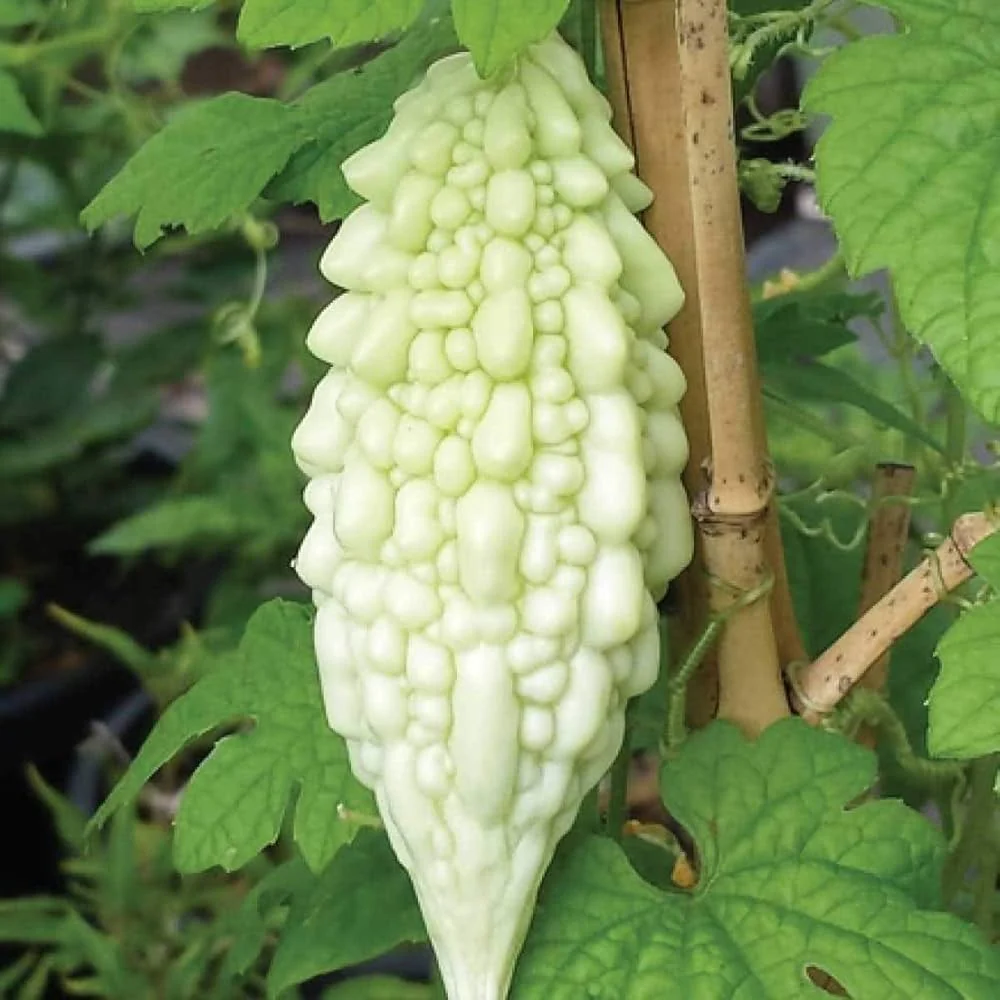

In [ ]:
from IPython.display import Image, display

# Get the image data from the uploaded dictionary
image_data = uploaded[uploaded_filename]

# Display the image
display(Image(data=image_data))

In [ ]:
# Call the predict_vegetable function with the uploaded image and the trained model
predicted_vegetable = predict_vegetable(uploaded_filename, svm_model)

# Print the predicted vegetable class
if predicted_vegetable:
    print(f"The uploaded image is predicted to be: {predicted_vegetable}")
else:
    print("Could not predict the vegetable class.")

The uploaded image is predicted to be: Cauliflower
